# **Stable Diffusion**

In [1]:
!pip install --upgrade diffusers[torch]

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

def generate_image(prompt):
    image = pipe(prompt).images[0]
    return image

2024-09-11 14:10:43.911625: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-11 14:10:44.460689: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 14:10:45.730031: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/admincit/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
import base64
from io import BytesIO
from PIL import Image

def convert_image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue())
    # img_base64 = bytes("data:image/jpeg;base64,", encoding='utf-8') + img_str
    # img_base64 = img_base64.decode("utf-8")
    img_base64 = img_str.decode("utf-8")
    return img_base64

def convert_base64_to_image(img_base64):
    img_bytes = base64.b64decode(img_base64)
    img = Image.open(BytesIO(img_bytes))
    return img

In [4]:
prompt = "a photo of a cat"
image = generate_image(prompt)
image_base64 = convert_image_to_base64(image)
image_base64

  0%|          | 0/50 [00:00<?, ?it/s]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAIAAgADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDnZNMlMIF5eIolwSHG3AH+1jH61M9nYWFsk0MUmyTKmcodz+yZ/nWGZ2Xekl+JZAc+SD8uPduwqW3eQzmS5vCigHLoxcr9GYHFYp9joaJf7XuLYJFYo1srnaFhz5rn04zz9enpVXVLLWVuoFvHkE7kOBuJkGf7w9T6VqRqsAj

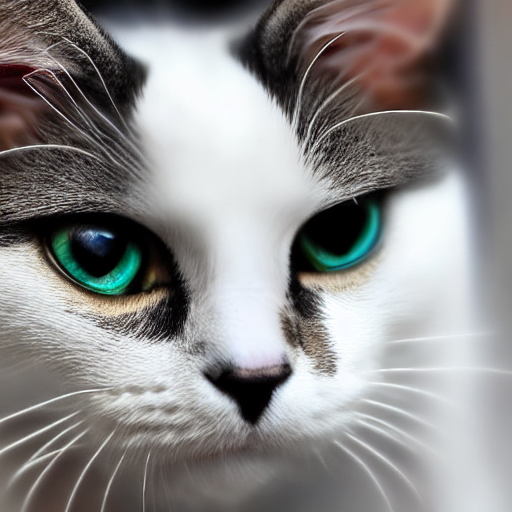

In [5]:
image


# **Transformer**

In [6]:
!pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 31.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autotrain-advanced 0.8.13 requires torchmetrics==1.4.0, which is not installed.
autotrain-advanced 0.8.13 requires accelerate==0.33.0, but you hav

In [7]:
from transformers import pipeline

captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

def generate_caption(image):
    captions = captioner(image)
    generated_caption = captions[0]['generated_text']
    return generated_caption

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/home/admincit/.local/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/home/admincit/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [8]:
!pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def get_similarity_score(prompt, generated_caption):
    embeddings1 = model.encode(prompt, convert_to_tensor=True)
    embeddings2 = model.encode(generated_caption, convert_to_tensor=True)

    similarity = util.pytorch_cos_sim(embeddings1, embeddings2).item()
    return similarity

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

**CNNIQA MOdel Set Up**

In [1]:
!git clone https://github.com/lidq92/CNNIQA.git

fatal: destination path 'CNNIQA' already exists and is not an empty directory.


In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
%cd CNNIQA
!pip install pytorch-ignite

/home/admincit/Desktop/iqa_gui_prototype/CNNIQA
Defaulting to user installation because normal site-packages is not writeable


In [3]:
!python3 main.py

exp id: 0
database: LIVE
model: CNNIQA
# Train Images: 457
Ref Index:
[22.  6.  3. 16. 11.  7. 28. 17. 14.  8.  5. 29. 21. 25. 27. 26. 19.]
# Val Images: 162
# Test Images: 160
Ref Index:
[24. 13.  9. 20. 10. 12.]
CNNIQAnet(
  (conv1): Conv2d(1, 50, kernel_size=(7, 7), stride=(1, 1))
  (fc1): Linear(in_features=100, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=800, bias=True)
  (fc3): Linear(in_features=800, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
/home/admincit/Desktop/iqa_gui_prototype/CNNIQA/main.py:71: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  krocc = stats.stats.kendalltau(sq, q)[0]
Validation Results - Epoch: 1 SROCC: 0.8566 KROCC: 0.6844 PLCC: 0.8603 RMSE: 14.4800 MAE: 10.9417 OR: 72.22%
Testing Results    - Epoch: 1 SROCC: 0.9060 KROCC: 0.7414 PLCC: 0.8843 RMSE: 13.1711 MAE: 10.2796 OR: 68.12%
Validation Results - Epoch: 2 SROCC: 0

**The CNNIQA TEST Function**


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
def evaluate_single_image(model, image_path, device):
    """
    Evaluate the model on a single image and return the predicted quality score.

    Parameters:
    - model: The trained CNNIQA model.
    - image_path: Path to the input image.
    - device: The device to run the evaluation on (CPU or GPU).

    Returns:
    - predicted_quality: The predicted quality score for the input image.
    """
    # Preprocess the image
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),  # Resize to the input size of the model
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
    ])
    image_tensor = preprocess(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Evaluate the model
    with torch.no_grad():
        output = model(image_tensor)
        predicted_quality = torch.mean(output).item()

    return predicted_quality

# Example usage
if __name__ == "__main__":
    # Assume `model` is the trained CNNIQA model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.load_state_dict(torch.load(trained_model_file, map_location=device))  # Load the best model

    # Evaluate on a single image
    image_path = '/home/admincit/Desktop/iqa_gui_prototype/databaserelease2/Dataset/Test/Real/20.jpg'
    predicted_quality = evaluate_single_image(model, image_path, device)
    print(f'Predicted Quality Score: {predicted_quality}')

In [10]:
import threading

def run_with_tmole(app):
    def run_flask(app):
        app.run()
    t = threading.Thread(target=run_flask, args=(app,))
    t.start()
    !tmole 5000
    t.join()

In [11]:
from flask import Flask, request
import threading

app = Flask(__name__)

@app.route('/generate_image')
def generate_image_endpoint():
    prompt = request.args.get('prompt')
    image = generate_image(prompt)
    image_base64 = convert_image_to_base64(image)
    generated_caption = generate_caption(image_base64)
    similarity_score = get_similarity_score(prompt, generated_caption)
    return {
        'image_base64': image_base64,
        'generated_caption': generated_caption,
        'similarity_score': similarity_score
    }

if __name__ == '__main__':
    # run_with_tmole(app)
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [12]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA RTX A5000
